# M6_AI1: Recaudación de películas (IMDB)
#### Autor: Leandro Gutierrez
#### Este documento intenta dar respuesta a la actividad 1 propuesta en el Modulo **Técnicas de Machine Learning** del **Master en Big Data y Ciencia de Datos**. En él se describirán cada uno de los enunciados postulados y los resultados obtenidos utilizando Python y Google Colab.
#### Noviembre 4, 2024

# Enunciado
### Contexto
IMDb (acrónimo de Internet Movie Database) es una base de datos on-line de información relacionada con películas, programas de televisión, videos caseros, videojuegos y contenido de transmisión en línea - incluidos los actores, el equipo de producción y biografías personales, resúmenes de tramas, trivia, calificaciones y reseñas de fans y críticas. Originalmente, fue un sitio web operado por fanáticos, la base de datos ahora es propiedad y está operada por IMDb.com, Inc., una subsidiaria de Amazon.

A diciembre de 2020, IMDb tenía, aproximadamente, 7,5 millones de títulos (incluidos episodios) y 10,4 millones de personalidades en su base de datos, así como 83 millones de usuarios registrados. 
El dataset original es mucho mayor, pero ha sido reducido para eliminar procesos de limpieza de datos.

### Descripción de las variables: 

- Imdb_title_id: id único de cada película. 
- Original_title: título original de la película. 
- Year: año. 
- Genre: género. 
- Duration: duración en minutos. 
- Country: país. 
- Director: director. 
- Actors: actor principal. 
- Avg_votes: media de los votos de los usuarios. 
- Avg_vote_weighted: media ponderada de la media de los votos con su número. 
- Votes: número de votos de los usuarios. 
- Budget: presupuesto destinado a su producción. 
- Worldwide_gross_income: ingresos generados en todo el mundo. 
- Reviews_from_users: número de opiniones de usuarios. 
- Reviews_from_critics: número de opiniones de críticos. 

### Enunciados: 
1. Aplicar el algoritmo de ÁRBOLES de DECISIÓN para la estimación de la recaudación de una película, dadas las variables: genre, duration, country, director, actors y Budget. 
2. Aplicar el algoritmo de ÁRBOLES de DECISIÓN para la estimación de la media ponderada de los votos en IMDB (avg_vote_weighted) atendiendo a las variables: genre, duration, country, director, actors, budget, worldwide_gross_income, reviews_from_users y reviews_from_critics.

**Con todos estos datos se pide lo siguiente:**

1. Preprocesado de conversión de tipos de datos (comentado arriba). 
2. Generación de los dos modelos que se piden. 
3. Comentarios sobre la elección de los parámetros de los modelos finales. 
4. Comentarios sobre los resultados. 
5. Estimación de la recaudación de dos películas con los valores que queráis; eligiendo país, género, director, etc., a vuestro gusto. 
6. Estimación del rating de dos películas con los valores que queráis; eligiendo país, género, director, etc., a vuestro gusto. 


# Solución

# Enunciado 1: estimación de la recaudación de una película

## 1.1 Preprocesamiento de los datos 

### Carga de datos

In [1]:
# importamos las librerias
import pandas as pd
import matplotlib.pyplot as plt
import numpy

# definimos el path donde buscar los datos
path = 'data/movies.csv'

# creamos dataframe
df_org = pd.read_csv(path, sep=';', decimal='.')

In [62]:
# previsualizamos los datos
df_org.head(5)

,imdb_title_id,original_title,year,genre,duration,country,director,actors,avg_vote,votes,avg_vote_weighted,budget,worlwide_gross_income,reviews_from_users,reviews_from_critics
0,tt0010323,Das Cabinet des Dr. Caligari,1920,"Fantasy, Horror, Mystery",76,Germany,Robert Wiene,Werner Krauss,8.1,55601,7.99,$ 18000,$ 8811,237,160
1,tt0012190,The Four Horsemen of the Apocalypse,1921,"Drama, Romance, War",150,USA,Rex Ingram,Pomeroy Cannon,7.2,3058,6.61,$ 800000,$ 9183673,45,16
2,tt0014624,A Woman of Paris: A Drama of Fate,1923,"Drama, Romance",82,USA,Charles Chaplin,Edna Purviance,7.0,4735,6.61,$ 351000,$ 11233,37,24
3,tt0015864,The Gold Rush,1925,"Adventure, Comedy, Drama",95,USA,Charles Chaplin,Charles Chaplin,8.2,97480,8.13,$ 923000,$ 26916,190,125
4,tt0018455,Sunrise: A Song of Two Humans,1927,"Drama, Romance",94,USA,F.W. Murnau,George O'Brien,8.1,46069,7.97,$ 200000,$ 121107,250,186


In [3]:
# copiamos dataframe para no alterar original
df = df_org.copy()

### Análisis del dataset

In [4]:
df.shape

(8664, 15)

Nuestro dataset cuenta con un total de 8664 observaciones y 15 variables.

In [5]:
df.isna().sum()

imdb_title_id            0
original_title           0
year                     0
genre                    0
duration                 0
country                  0
director                 0
actors                   0
avg_vote                 0
votes                    0
avg_vote_weighted        0
budget                   0
worlwide_gross_income    0
reviews_from_users       0
reviews_from_critics     0
dtype: int64

Podemos observar que no se encuentran valores nulos en nuestro set de datos.

In [6]:
# resumen de los datos
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8664 entries, 0 to 8663
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   imdb_title_id          8664 non-null   object 
 1   original_title         8664 non-null   object 
 2   year                   8664 non-null   int64  
 3   genre                  8664 non-null   object 
 4   duration               8664 non-null   int64  
 5   country                8664 non-null   object 
 6   director               8664 non-null   object 
 7   actors                 8664 non-null   object 
 8   avg_vote               8664 non-null   float64
 9   votes                  8664 non-null   int64  
 10  avg_vote_weighted      8664 non-null   float64
 11  budget                 8664 non-null   object 
 12  worlwide_gross_income  8664 non-null   object 
 13  reviews_from_users     8664 non-null   int64  
 14  reviews_from_critics   8664 non-null   int64  
dtypes: f

Es posible notar que algunos de las las variables fueron mapeadas a tipo `object`, probablemente estas variables provengan de datos tipo string. Deberemos hacer un pequeño trabajo de preprocesamiento de nuestros datos para poder utilizarlos a lo largo del trabajo.

### Tratamiento de los datos

Pudimos ver al analizar la cabecera de nuestro dataset que algunas columnas como `genre` y `country` parecen tener multiples valores para cada observación, por lo que necesitamos checkear si alguna de las otras columnas categóricas posee esta condición de lista

In [7]:
# verificamos si existen mas de un elemento en cada varaible
print('director son listas: ', len(df[df['director'].str.contains(',') == True]))
print('actors son listas: ', len(df[df['actors'].str.contains(',') == True]))
print('country son listas: ', len(df[df['country'].str.contains(',') == True]))
print('genre son listas: ', len(df[df['genre'].str.contains(',') == True]))

director son listas:  0
actors son listas:  0
country son listas:  2978
genre son listas:  7631


2978 y 7631 de las observaciones tienen valores múltiples en las  las columnas `country` y `genre`, respectivamente. Comenzamos convirtiendo los valores a listas (Series) mediante un `split` utilizando el caracter `coma` (`,`) como divisor


In [8]:
# convertimos en lista
df['genre'] = df['genre'].str.split(',')
df['country'] = df['country'].str.split(',')

In [9]:
# visualizamos las que pertenecen al genero romance
df[df['genre'].apply(lambda x: 'Romance' in x)].head()

,imdb_title_id,original_title,year,genre,duration,country,director,actors,avg_vote,votes,avg_vote_weighted,budget,worlwide_gross_income,reviews_from_users,reviews_from_critics
112,tt0050407,Forty Guns,1957,"[Romance, Western]",80,[USA],Samuel Fuller,Barbara Stanwyck,7.0,4515,6.60,$ 300000,$ 6344,52,60
119,tt0051393,The Badlanders,1958,"[Romance, Western]",85,[USA],Delmer Daves,Alan Ladd,6.4,1170,6.11,$ 1436000,$ 4006,36,8
794,tt0088172,Starman,1984,"[Romance, Sci-Fi]",115,[USA],John Carpenter,Jeff Bridges,7.0,41736,6.93,$ 22000000,$ 28744356,158,102
2284,tt0118523,'Til There Was You,1997,"[Romance, Comedy]",113,[USA],Scott Winant,John Plumpis,4.8,2633,5.44,$ 1000000,$ 3525125,38,22
2943,tt0182295,Love's Labour's Lost,2000,"[Romance, Comedy, Musical]",93,"[UK, France, USA]",Kenneth Branagh,Alessandro Nivola,6.0,4308,6.00,$ 13000000,$ 299792,104,63


Analicemos cuantos valores posibles toman ahora las columnas `genre` y `country`

In [10]:
# vemos la cantidad de valores diferentes de genero
print("genre posibles valores:", len(set([elemento for sublista in df['genre'] for elemento in sublista])))
print("country posibles valores:", len(set([elemento for sublista in df['country'] for elemento in sublista])))

genre posibles valores: 43
country posibles valores: 199


Vemos que tenemos 43 valores diferentes de géneros disponibles y 199 paises, donde cada película está taggeada con una o mas categorías y con uno o mas paises.

A modo de simplificar el problema y disminuir el costo computacional, tomaremos solo un genero y un país por película, se considera que el primer elemento de cada lista es el más representativo y la pérdida de información inducida no es considerable

In [11]:
# nos quedamos con el primer elemento de cada lista de géneros
df['genre_first'] = df['genre'].apply(lambda x: x[0] if len(x) > 0 else None)
df['country_first'] = df['country'].apply(lambda x: x[0] if len(x) > 0 else None)


In [12]:
# checkeamos los datos
df[['genre', 'genre_first', "country", "country_first"]]

,genre,genre_first,country,country_first
0,"[Fantasy, Horror, Mystery]",Fantasy,[Germany],Germany
1,"[Drama, Romance, War]",Drama,[USA],USA
2,"[Drama, Romance]",Drama,[USA],USA
3,"[Adventure, Comedy, Drama]",Adventure,[USA],USA
4,"[Drama, Romance]",Drama,[USA],USA
...,...,...,...,...
8659,"[Comedy, Romance]",Comedy,"[USA, Canada]",USA
8660,"[Animation, Drama, Family]",Animation,"[Japan, China]",Japan
8661,"[Drama, History]",Drama,[Philippines],Philippines
8662,"[Biography, Drama, Music]",Biography,[USA],USA


Veamos ahora la cantidad de valores únicos de cada columna

In [13]:
print("genre posibles valores:", df['genre_first'].nunique())
print("country posibles valores:", df['country_first'].nunique())
print("actors posibles valores:", df['actors'].nunique())
print("directors posibles valores:", df['director'].nunique())

genre posibles valores: 22
country posibles valores: 88
actors posibles valores: 3986
directors posibles valores: 4056


Teniendo ahora un valor único para cada variable predictora categórica y siendo necesario una numerización de las mismas para la implementación de arbol decisorio que utilizaremos, procedemos a encodearlas con un numero entero, hay que recordar que son variables no oridinales

In [14]:
# creamos columnas auxiliares con los encondings
df['director_enc'] = df['director'].astype('category').cat.codes
df['actors_enc'] = df['actors'].astype('category').cat.codes
df['genre_enc'] = df['genre_first'].astype('category').cat.codes
df['country_enc'] = df['country_first'].astype('category').cat.codes

# hacemos un pequeño control buscando al actor `Shia LeBeouf`
df[df["actors_enc"] == 3469].head(10)

,imdb_title_id,original_title,year,genre,duration,country,director,actors,avg_vote,votes,...,budget,worlwide_gross_income,reviews_from_users,reviews_from_critics,genre_first,country_first,director_enc,actors_enc,genre_enc,country_enc
3941,tt0357470,The Battle of Shaker Heights,2003,"[Drama, Romance, Comedy]",79,[USA],Efram Potelle,Shia LaBeouf,6.0,4180,...,$ 1000000,$ 280351,45,27,Drama,USA,1064,3469,7,79
4412,tt0418279,Transformers,2007,"[Action, Adventure, Sci-Fi]",144,[USA],Michael Bay,Shia LaBeouf,7.0,589274,...,$ 150000000,$ 709709780,1876,396,Action,USA,2587,3469,0,79
4461,tt0423294,Surf's Up,2007,"[Animation, Comedy, Family]",85,[USA],Ash Brannon,Shia LaBeouf,6.7,67541,...,$ 100000000,$ 152005713,130,161,Animation,USA,302,3469,2,79
4930,tt0486822,Disturbia,2007,"[Crime, Drama, Mystery]",105,[USA],D.J. Caruso,Shia LaBeouf,6.8,217146,...,$ 20000000,$ 118114220,531,247,Crime,USA,730,3469,5,79
5639,tt1055369,Transformers: Revenge of the Fallen,2009,"[Action, Adventure, Sci-Fi]",149,[USA],Michael Bay,Shia LaBeouf,6.0,379328,...,$ 200000000,$ 836303693,1500,376,Action,USA,2587,3469,0,79
5642,tt1059786,Eagle Eye,2008,"[Action, Mystery, Thriller]",118,"[USA, Germany]",D.J. Caruso,Shia LaBeouf,6.6,173902,...,$ 80000000,$ 178767383,359,214,Action,USA,730,3469,0,79
5945,tt1212450,Lawless,2012,"[Crime, Drama]",116,[USA],John Hillcoat,Shia LaBeouf,7.3,224295,...,$ 26000000,$ 55404207,326,364,Crime,USA,1897,3469,5,79
6276,tt1399103,Transformers: Dark of the Moon,2011,"[Action, Adventure, Sci-Fi]",154,[USA],Michael Bay,Shia LaBeouf,6.2,380021,...,$ 195000000,$ 1123794079,946,437,Action,USA,2587,3469,0,79


Por último tenemos que parsear y convertir los tipos de datos de las columnas `budget` y `worlwide_gross_income`

In [15]:
# hacemos repleace de los caracteres
df['budget_clean'] = df['budget'].replace('.*\\$ ', '', regex=True).astype(float)
df['worlwide_gross_income_clean'] = df['worlwide_gross_income'].replace('.*\\$ ', '', regex=True).astype(float)

# checkeamos resultados
df[['budget', 'budget_clean', 'worlwide_gross_income', 'worlwide_gross_income_clean']]

,budget,budget_clean,worlwide_gross_income,worlwide_gross_income_clean
0,$ 18000,18000.0,$ 8811,8811.0
1,$ 800000,800000.0,$ 9183673,9183673.0
2,$ 351000,351000.0,$ 11233,11233.0
3,$ 923000,923000.0,$ 26916,26916.0
4,$ 200000,200000.0,$ 121107,121107.0
...,...,...,...,...
8659,$ 5000000,5000000.0,$ 9341824,9341824.0
8660,$ 11100000,11100000.0,$ 193176979,193176979.0
8661,$ 500000,500000.0,$ 5986,5986.0
8662,$ 12000000,12000000.0,$ 13681524,13681524.0


Hasta este momento hemos hecho las siguientes modificaciones:
- Tomamos un único elemento para las columnas que originalmente se referían a listas de elementos: `genre` y `country`, intentando disminuir complejidad y carga computacional.
- Codificamos de manera númerica cada una de las columnas de tipo categóricas: `genre`, `country`, `director`, `actors`.
- Sanitizamos columnas que originalmente representaban dinero.

## 1.2 Aplicación modelo de Arboles de decisión

Analizaremos como influye la codificación que utilizamos durante la sanitización de nuestro dataset en el funcionamiento del arbol, experimentaremos con dos posibles inputs:
- Variables categóricas `director`, `actors`, `genre` y `country` encodeadas a enteros
- One hot encoding de estas variables categóricas

Veamos primero la opción sin hot encoding

In [16]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.tree import plot_tree

# genre, duration, country, director, actors y budget
features = df[['genre_enc', 'country_enc', 'actors_enc', 'director_enc', 'duration', 'budget_clean']].copy()
target = df[['worlwide_gross_income_clean']].copy()

# dividimos data train vs test
x_train, x_test, y_train, y_test = train_test_split(features, target, random_state=42, test_size=0.3 )

print (x_train.shape, y_train.shape)
print (x_test.shape, y_test.shape)

(6064, 6) (6064, 1)
(2600, 6) (2600, 1)


In [17]:
md_list = []
score_train_list = []
score_test_list = []
mse_train_list = []
mse_test_list = []

for maxdepth in list(range(1,10)):
  tree_model = DecisionTreeRegressor(random_state=42, max_depth=maxdepth)
  tree_model.fit(x_train, y_train)

  pred_train = tree_model.predict(x_train)
  pred_test = tree_model.predict(x_test)

  ## Generación de listas
  md_list.append(maxdepth)

  score_train_list.append(100.0*tree_model.score(x_train, y_train))
  score_test_list.append(100.0*tree_model.score(x_test, y_test))

  mse_train_list.append(mean_squared_error(y_train, pred_train))
  mse_test_list.append(mean_squared_error(y_test, pred_test))

rs = pd.DataFrame({"max_depth":md_list, 
                   "score_train":score_train_list,
                   "score_test":score_test_list,
                   "mse_train":mse_train_list,
                   "mse_test":mse_test_list})

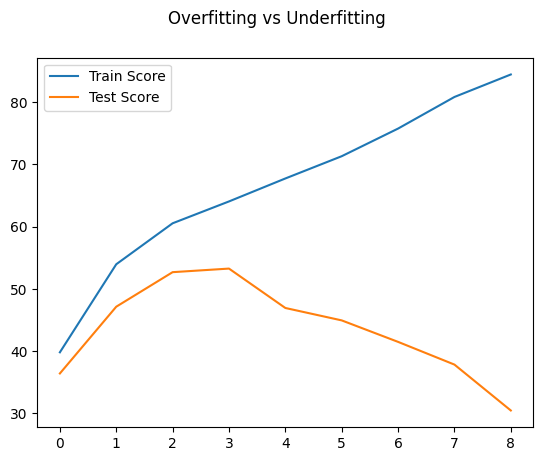

In [18]:
# visualizamos las curvas de score
rs.set_index("max_depth")
rs["score_train"].plot(label="Train Score")
rs["score_test"].plot(label="Test Score")
plt.suptitle("Overfitting vs Underfitting")
plt.legend()
plt.show();

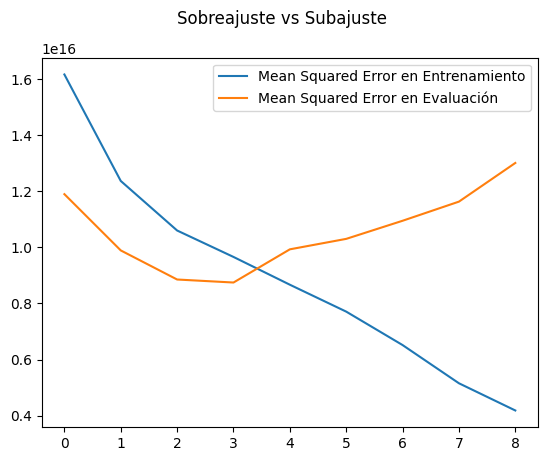

In [19]:
# visualizamos las curvas MSE
rs["mse_train"].plot(label="Mean Squared Error en Entrenamiento")
rs["mse_test"].plot(label="Mean Squared Error en Evaluación")
plt.suptitle("Sobreajuste vs Subajuste")
plt.legend()
plt.show();

Encontramo en el análisis visual un balance bastante razonable con una profundidad de entre 3 y 4 para nuestro arbol de decisión, a continuación tratamos de entender como están siendo considerados estos labels enteros que utilizamos para nuestras variables categóricas

## 1.3 Optimización de los parámetros

Tomaremos `max_depth = 4` para mostrar un punto respecto a la elección del encoding de las variables cualitativas en primer lugar, para luego proceder a la mejora del modelo y la definición final en la optimización de los parámteros

In [20]:

tree_model_1 = DecisionTreeRegressor(random_state=0, max_depth=4)
tree_model_1.fit(x_train, y_train)

DecisionTreeRegressor(max_depth=4, random_state=0)

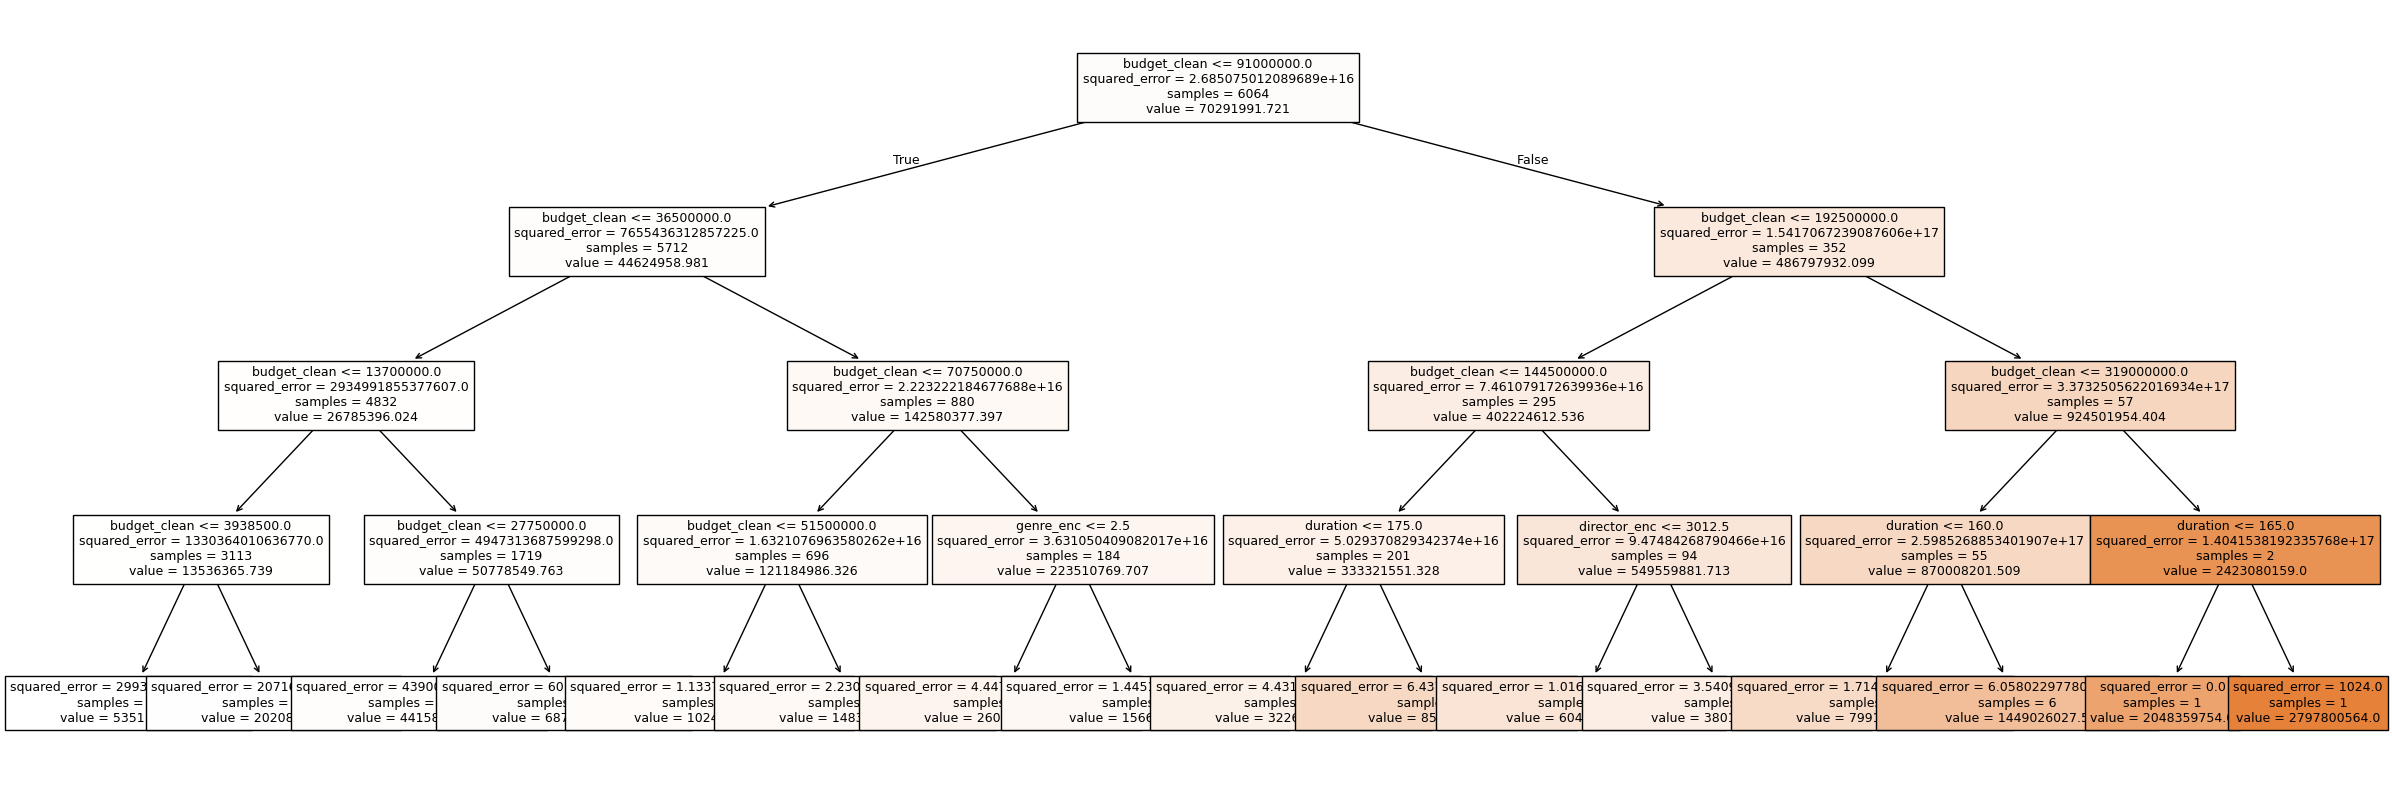

In [21]:
plt.figure(figsize=(30, 10))

plot_tree(tree_model_1, filled=True, max_depth=6, feature_names=features.columns, fontsize=9)
plt.show()

In [22]:
print (r2_score(y_train, pred_train))

0.8441341801256816


In [23]:
mae = mean_absolute_error(y_test, pred_test)
mse = mean_squared_error(y_test, pred_test)
rmse = numpy.sqrt(mse)
r2 = r2_score(y_test, pred_test)

# imprimimos las métricas de evaluación
print("Mean Absolute Error (MAE): {:.3f}".format(mae))
print("Mean Squared Error (MSE): {:.3f}".format(mse))
print("Root Mean Squared Error (RMSE): {:.3f}".format(rmse))
print("R-squared (R2): {:.3f}".format(r2))

Mean Absolute Error (MAE): 49215425.345
Mean Squared Error (MSE): 13006666483994860.000
Root Mean Squared Error (RMSE): 114046773.229
R-squared (R2): 0.305


Del análisis visual del arbol surge que el algoritmo parece haber interpretado como numéricas a las variables categóricas que sanitizamos anteriormente, y se puede ver como en algunos nodos decisorios existen comparaciones del tipo `genre <= 2.5` expresión que no tiene sentido para la categoria `genero` la cual es no ordinal. 

Intentaremos mejorar la interpretabilidad y calidad de nuestro modelo mediante otro approach, procederemos a realizar un hot-encoding de las variables cualitativas del dataset y veremos la estructura interna del arbol resultante

In [24]:
features_aux = df[['genre_enc', 'country_enc', 'actors_enc', 'director_enc', 'budget_clean', 'duration']]

features_aux = pd.get_dummies(features_aux, columns=['genre_enc'], drop_first=True)
features_aux = pd.get_dummies(features_aux, columns=['country_enc'], drop_first=True)
features_aux = pd.get_dummies(features_aux, columns=['actors_enc'], drop_first=True)
features_aux = pd.get_dummies(features_aux, columns=['director_enc'], drop_first=True)

features_aux.head()

,budget_clean,duration,genre_enc_1,genre_enc_2,genre_enc_3,genre_enc_4,genre_enc_5,genre_enc_6,genre_enc_7,genre_enc_8,...,director_enc_4046,director_enc_4047,director_enc_4048,director_enc_4049,director_enc_4050,director_enc_4051,director_enc_4052,director_enc_4053,director_enc_4054,director_enc_4055
0,18000.0,76,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,800000.0,150,False,False,False,False,False,False,True,False,...,False,False,False,False,False,False,False,False,False,False
2,351000.0,82,False,False,False,False,False,False,True,False,...,False,False,False,False,False,False,False,False,False,False
3,923000.0,95,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,200000.0,94,False,False,False,False,False,False,True,False,...,False,False,False,False,False,False,False,False,False,False


In [25]:
# dividimos entrenamiento y test
x_train, x_test, y_train, y_test = train_test_split(features_aux, target, random_state=42, test_size=0.3 )

print (x_train.shape, y_train.shape)
print (x_test.shape, y_test.shape)

(6064, 8150) (6064, 1)
(2600, 8150) (2600, 1)


In [26]:
md_list = []
score_train_list = []
score_test_list = []
mse_train_list = []
mse_test_list = []

for maxdepth in list(range(1,10)):
  tree_model = DecisionTreeRegressor(random_state=42, max_depth=maxdepth)
  tree_model.fit(x_train, y_train)

  pred_train = tree_model.predict(x_train)
  pred_test = tree_model.predict(x_test)

  md_list.append(maxdepth)

  score_train_list.append(100.0*tree_model.score(x_train, y_train))
  score_test_list.append(100.0*tree_model.score(x_test, y_test))

  mse_train_list.append(mean_squared_error(y_train, pred_train))
  mse_test_list.append(mean_squared_error(y_test, pred_test))

rs = pd.DataFrame({"max_depth":md_list, 
                   "score_train":score_train_list,
                   "score_test":score_test_list,
                   "mse_train":mse_train_list,
                   "mse_test":mse_test_list})

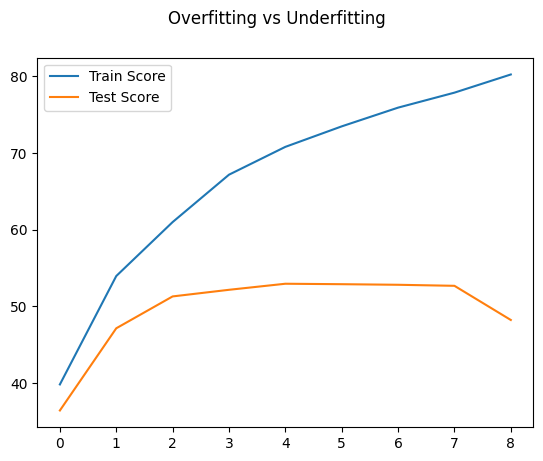

In [27]:
# visualizamos las curvas de score
rs.set_index("max_depth")
rs["score_train"].plot(label="Train Score")
rs["score_test"].plot(label="Test Score")
plt.suptitle("Overfitting vs Underfitting")
plt.legend()
plt.show();

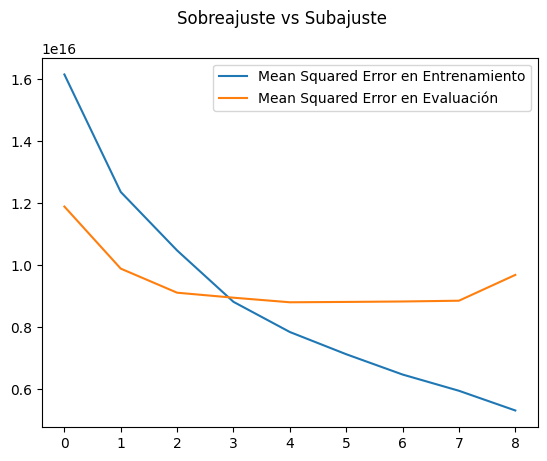

In [28]:
# visualizamos las curvas de MSE
rs["mse_train"].plot(label="Mean Squared Error en Entrenamiento")
rs["mse_test"].plot(label="Mean Squared Error en Evaluación")
plt.suptitle("Sobreajuste vs Subajuste")
plt.legend()
plt.show();

Comprendemos del análisis visual que un buen valor para la profundidad del arbol es 3, donde se tiene un buen balance entre el error cuardrárico medio $MSE$ y el $R^2$.

Veamos ahora como queda nuestro modelo de arbol decisorio final y sus métricas de calidad

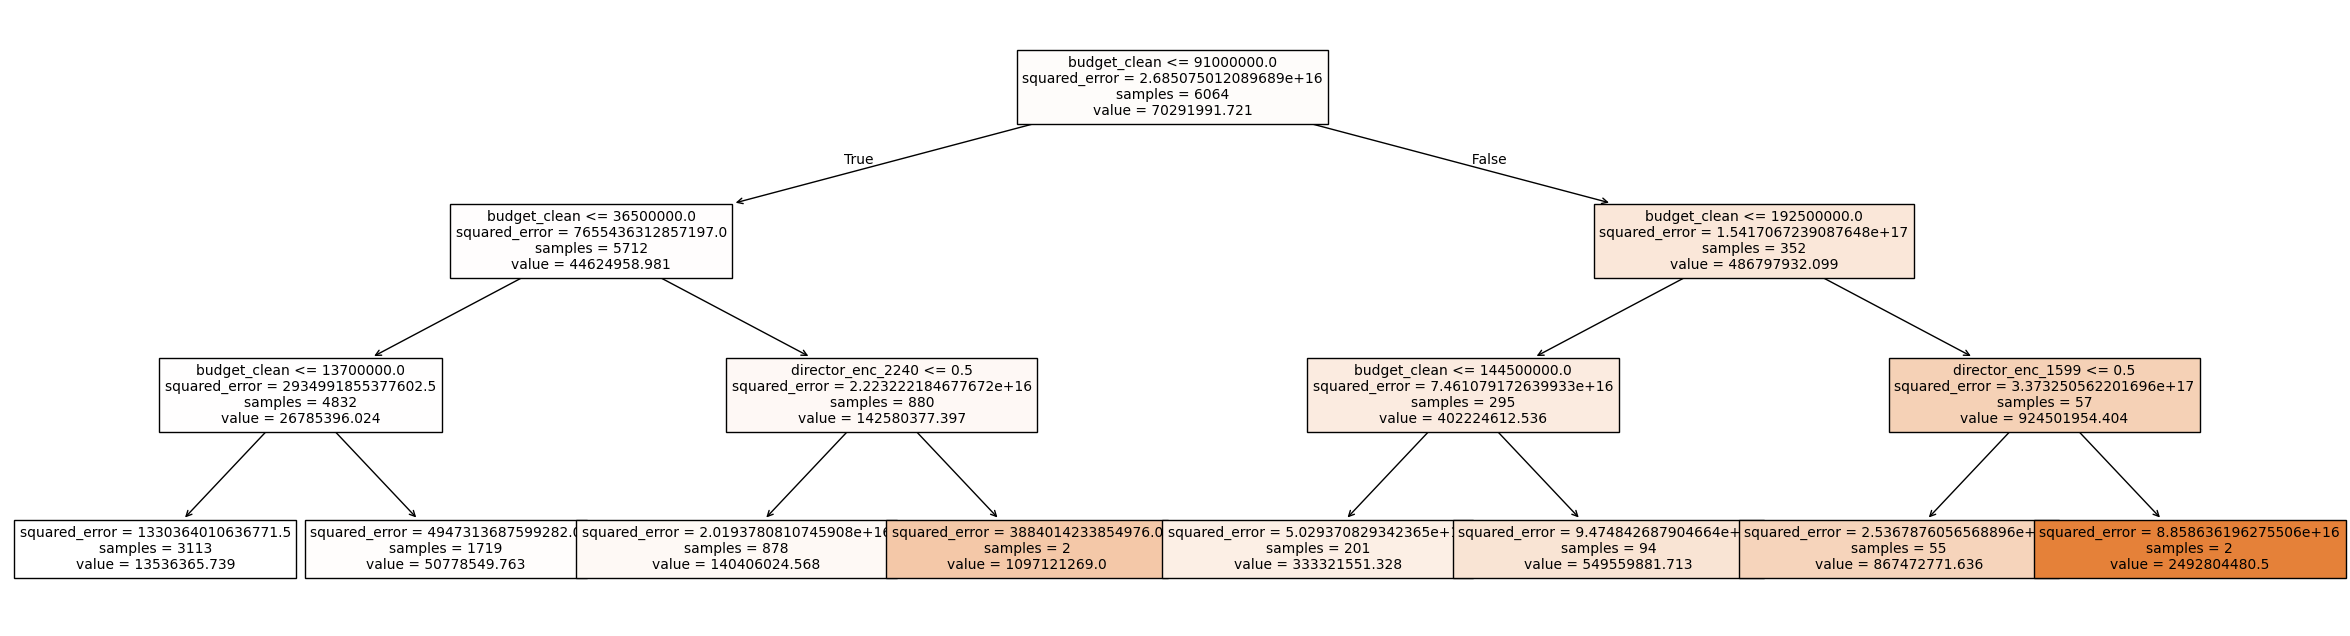

In [29]:
# creamos el modelo con max_depth = 3
tree_model_2 = DecisionTreeRegressor(random_state=4, max_depth=3)

# entrenamos el modelo
tree_model_2.fit(x_train, y_train)

# realizamos las predicciones
pred_train = tree_model.predict(x_train)
pred_test = tree_model.predict(x_test)

# visualizamos el grafo
plt.figure(figsize=(30,8))
plot_tree(tree_model_2, filled=True, max_depth=5, feature_names=features_aux.columns,fontsize=10)
plt.show()

Las condiciones lógicas pasaron a ser dicotómicas y no comparaciones de valores numéricos, por ejemplo podemos ver la expresión `director_enc_1599 <= 0.5`, donde el director de label **1599** corresponde a `James Cameron`, la pregunta que se hace tiene la forma `¿Es el director de la pélicula James Cameron?`

In [30]:
# vemos los daots del director_enc_1599 (James Cameron)
features_aux[features_aux['director_enc_1599'] == True].head()

,budget_clean,duration,genre_enc_1,genre_enc_2,genre_enc_3,genre_enc_4,genre_enc_5,genre_enc_6,genre_enc_7,genre_enc_8,...,director_enc_4046,director_enc_4047,director_enc_4048,director_enc_4049,director_enc_4050,director_enc_4051,director_enc_4052,director_enc_4053,director_enc_4054,director_enc_4055
800,6400000.0,107,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
902,18500000.0,137,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1223,70000000.0,171,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1550,102000000.0,137,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1972,115000000.0,141,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [31]:
# vemos los daots del director_enc_1599 (James Cameron)
df[df['director_enc'] == 1599].head()

,imdb_title_id,original_title,year,genre,duration,country,director,actors,avg_vote,votes,...,reviews_from_users,reviews_from_critics,genre_first,country_first,director_enc,actors_enc,genre_enc,country_enc,budget_clean,worlwide_gross_income_clean
800,tt0088247,The Terminator,1984,"[Action, Sci-Fi]",107,"[UK, USA]",James Cameron,Arnold Schwarzenegger,8.0,784356,...,893,235,Action,UK,1599,319,0,78,6400000.0,78680331.0
902,tt0090605,Aliens,1986,"[Action, Adventure, Sci-Fi]",137,"[USA, UK]",James Cameron,Sigourney Weaver,8.3,639500,...,1302,310,Action,USA,1599,3480,0,79,18500000.0,131384634.0
1223,tt0096754,The Abyss,1989,"[Adventure, Drama, Mystery]",171,[USA],James Cameron,Ed Harris,7.6,159766,...,433,106,Adventure,USA,1599,1042,1,79,70000000.0,90000098.0
1550,tt0103064,Terminator 2: Judgment Day,1991,"[Action, Sci-Fi]",137,"[USA, France]",James Cameron,Arnold Schwarzenegger,8.5,974970,...,1279,296,Action,USA,1599,319,0,79,102000000.0,520884847.0
1972,tt0111503,True Lies,1994,"[Action, Comedy, Thriller]",141,[USA],James Cameron,Arnold Schwarzenegger,7.2,232830,...,405,97,Action,USA,1599,319,0,79,115000000.0,378882411.0


## 1.4 Análisis de los resultados obtenidos

Veamos ahora las métricas del nuevo modelo con hot-encoding

In [32]:
print (r2_score(y_train, pred_train))

0.802287640454186


In [33]:
# calculamos métricas de evaluación
mae = mean_absolute_error(y_test, pred_test)
mse = mean_squared_error(y_test, pred_test)
rmse = numpy.sqrt(mse)
r2 = r2_score(y_test, pred_test)

# imprimimos las métricas de evaluación
print("Mean Absolute Error (MAE): {:.3f}".format(mae))
print("Mean Squared Error (MSE): {:.3f}".format(mse))
print("Root Mean Squared Error (RMSE): {:.3f}".format(rmse))
print("R-squared (R2): {:.3f}".format(r2))

Mean Absolute Error (MAE): 45363608.476
Mean Squared Error (MSE): 9687213504579534.000
Root Mean Squared Error (RMSE): 98423643.016
R-squared (R2): 0.482


Notamos una mejora sustancial:
- MAE: 49215425 -> 45363608 [USD]
- RMSE: 114046773 -> 98423643 [USD]
- R2: 0.305 -> 0.482

Podemos ver que del modelo con hot-encoding de las variables categóricas nos entrega mejores métricas de evaluación que el primer modelo simplificado. Además es apreciable la ganancia en la interpretabilidad de las condinciones que definene el arbol, al volverse estas dicotómicas `¿Es el director de esta pélicula James Cameron?`.

## 1.5 Predicciones

Trataremos de predecir la ganancia neta de la pélicula sabiendo que el director es `Stanley Kubrick`, tiene como pais de origen `UK` y el género que más la representa es `Adventure`. Lo primero que debemos hacer es descubrir que valores tomaron las variables dummies para la triada seleccionada. Hagamos un select de los datos y veamos sus valores.

In [34]:
# eligiendo país, género, director
df[(df['country_first'] == 'UK') & (df['director'] == 'Stanley Kubrick') & (df['genre_first'] == 'Adventure')].head()

,imdb_title_id,original_title,year,genre,duration,country,director,actors,avg_vote,votes,...,reviews_from_users,reviews_from_critics,genre_first,country_first,director_enc,actors_enc,genre_enc,country_enc,budget_clean,worlwide_gross_income_clean
206,tt0062622,2001: A Space Odyssey,1968,"[Adventure, Sci-Fi]",149,"[UK, USA]",Stanley Kubrick,Keir Dullea,8.3,587866,...,2163,267,Adventure,UK,3532,2091,1,78,12000000.0,68989547.0
321,tt0072684,Barry Lyndon,1975,"[Adventure, Drama, History]",185,"[UK, USA]",Stanley Kubrick,Ryan O'Neal,8.1,145315,...,463,107,Adventure,UK,3532,3298,1,78,11000000.0,198992.0


Encontramos que Kubric corresponde a los valores de `director_enc_3532 = True`, así como UK corresponde a `country_enc_78` y Aventura a `genre_enc_1`.

Dada la complejidad de armar una fila de entrada al modelo, lo que haremos es tomar una ya exisitente (la primera del subset) y modidicar sus valores para llevarlos a 0 o False según corresponda

In [35]:
# selecionamos una pelicula con las características deseadas
kubrick_uk_adv = features_aux[(features_aux['country_enc_78'] == True) & (features_aux['director_enc_3532'] == True) & (features_aux['genre_enc_1'] == True)].iloc[[0]].copy()
kubrick_uk_adv

,budget_clean,duration,genre_enc_1,genre_enc_2,genre_enc_3,genre_enc_4,genre_enc_5,genre_enc_6,genre_enc_7,genre_enc_8,...,director_enc_4046,director_enc_4047,director_enc_4048,director_enc_4049,director_enc_4050,director_enc_4051,director_enc_4052,director_enc_4053,director_enc_4054,director_enc_4055
206,12000000.0,149,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


Seteamos los demás valores de las columnas en 0 cuando corresponda

In [36]:
# seteamos en 0 valores para que no influyan en la predicción buscada
kubrick_uk_adv['budget_clean'] = 0
kubrick_uk_adv['duration'] = 0

Ahora si, realizamos la predicción

In [37]:
# predecimos
prediction = tree_model_2.predict(kubrick_uk_adv)
print("Predicción [USD]:", prediction)

Predicción [USD]: [13536365.7394796]


Obtenemos una predicción de una recaudación total de 13536365 de dolares para las condiciones iniciales planteadas.

# Enunciado 2: estimación de la media ponderada de los votos en IMDB

## 2.1 Preparación de los datos

In [38]:
# seleccionamos las variables que nos interesas
features_aux_2 = df[['genre_enc', 'country_enc', 'actors_enc', 'director_enc', 'budget_clean', 'duration', 'worlwide_gross_income_clean', 'reviews_from_users', 'reviews_from_critics']]

# generamos columnas dummies
features_aux_2 = pd.get_dummies(features_aux_2, columns=['genre_enc'], drop_first=True)
features_aux_2 = pd.get_dummies(features_aux_2, columns=['country_enc'], drop_first=True)
features_aux_2 = pd.get_dummies(features_aux_2, columns=['actors_enc'], drop_first=True)
features_aux_2 = pd.get_dummies(features_aux_2, columns=['director_enc'], drop_first=True)

features_aux_2.head()

,budget_clean,duration,worlwide_gross_income_clean,reviews_from_users,reviews_from_critics,genre_enc_1,genre_enc_2,genre_enc_3,genre_enc_4,genre_enc_5,...,director_enc_4046,director_enc_4047,director_enc_4048,director_enc_4049,director_enc_4050,director_enc_4051,director_enc_4052,director_enc_4053,director_enc_4054,director_enc_4055
0,18000.0,76,8811.0,237,160,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,800000.0,150,9183673.0,45,16,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,351000.0,82,11233.0,37,24,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,923000.0,95,26916.0,190,125,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,200000.0,94,121107.0,250,186,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


## 2.2 Aplicación modelo de Arboles de decisión

In [39]:
# realizamos una copia de los datos objetivo
target_aux_2 = df[['avg_vote_weighted']].copy()

# spliteamos entrenamiento y testeo
x_train, x_test, y_train, y_test = train_test_split(features_aux_2, target_aux_2, random_state=42, test_size=0.3)

print (x_train.shape, y_train.shape)
print (x_test.shape, y_test.shape)

(6064, 8153) (6064, 1)
(2600, 8153) (2600, 1)


In [40]:
md_list = []
score_train_list = []
score_test_list = []
mse_train_list = []
mse_test_list = []

for maxdepth in list(range(1,10)):
  tree_model = DecisionTreeRegressor(random_state=42, max_depth=maxdepth)
  tree_model.fit(x_train, y_train)

  pred_train = tree_model.predict(x_train)
  pred_test = tree_model.predict(x_test)

  md_list.append(maxdepth)

  score_train_list.append(100.0*tree_model.score(x_train, y_train))
  score_test_list.append(100.0*tree_model.score(x_test, y_test))

  mse_train_list.append(mean_squared_error(y_train, pred_train))
  mse_test_list.append(mean_squared_error(y_test, pred_test))

rs = pd.DataFrame({"max_depth":md_list, 
                   "score_train":score_train_list,
                   "score_test":score_test_list,
                   "mse_train":mse_train_list,
                   "mse_test":mse_test_list})

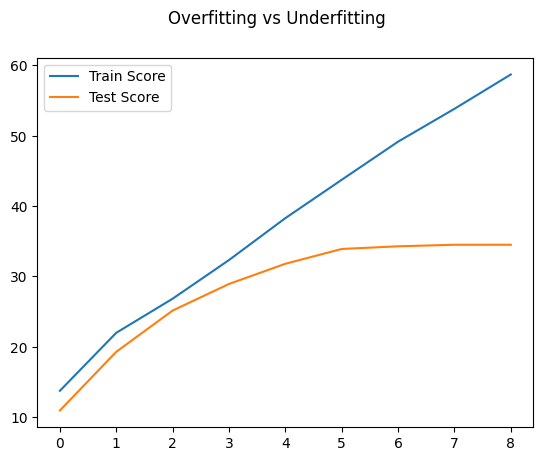

In [41]:
# visualizamos curvas de r2
rs.set_index("max_depth")
rs["score_train"].plot(label="Train Score")
rs["score_test"].plot(label="Test Score")
plt.suptitle("Overfitting vs Underfitting")
plt.legend()
plt.show();

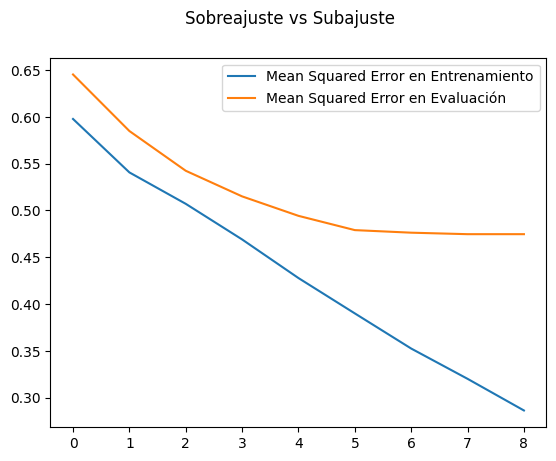

In [42]:
# visualizamos curvas de mse
rs["mse_train"].plot(label="Mean Squared Error en Entrenamiento")
rs["mse_test"].plot(label="Mean Squared Error en Evaluación")
plt.suptitle("Sobreajuste vs Subajuste")
plt.legend()
plt.show();

## 2.3 Optimización de los parámetros

Del análisis visual de los gráficos anteriores surge que un buen nivel de profundidad para nuestro arbol es 5

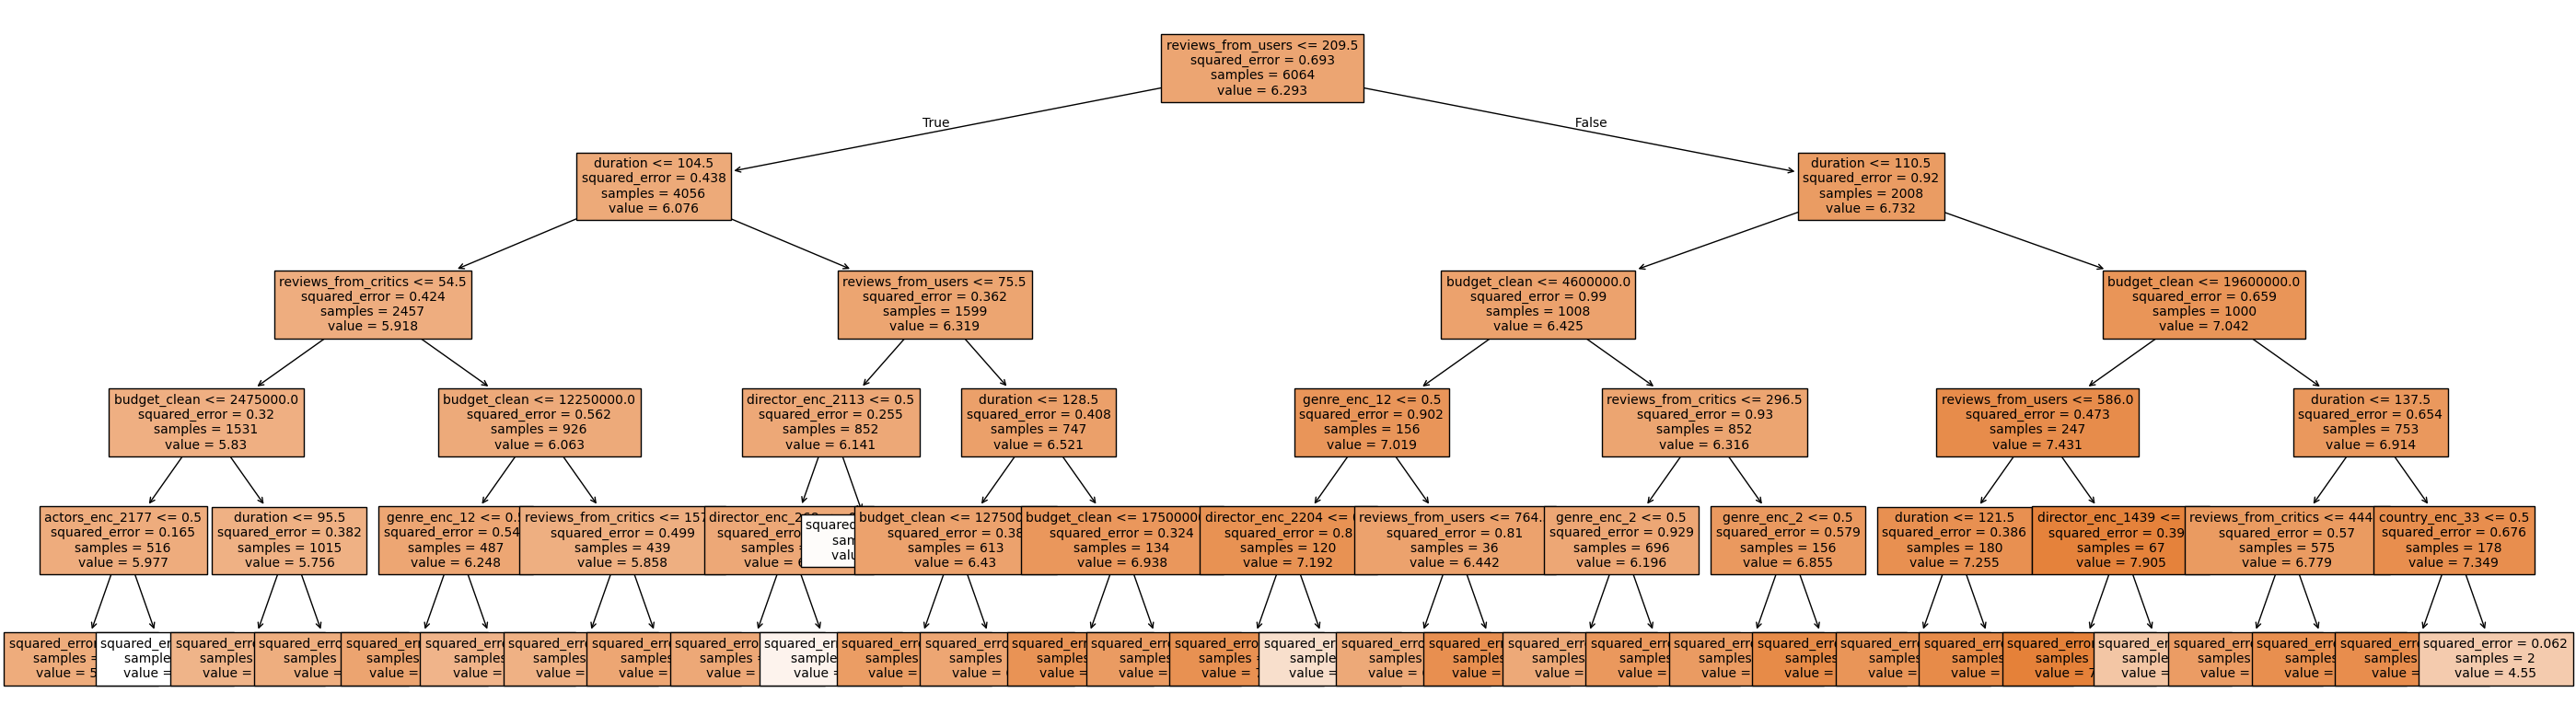

In [58]:
# creamos el modelo con max_depth = 5
tree_model_3 = DecisionTreeRegressor(random_state=4, max_depth=5)

# entrenamos el modelo
tree_model_3.fit(x_train, y_train)

# realizamos las predicciones
pred_train = tree_model.predict(x_train)
pred_test = tree_model.predict(x_test)

# visualizamos el grafo
plt.figure(figsize=(35,10))
plot_tree(tree_model_3, filled=True, max_depth=6, feature_names=features_aux_2.columns, fontsize=10)
plt.show()

## 2.4 Análisis de los resultados obtenidos

In [59]:
# calculamos métricas de evaluación
mae = mean_absolute_error(y_test, pred_test)
mse = mean_squared_error(y_test, pred_test)
rmse = numpy.sqrt(mse)
r2 = r2_score(y_test, pred_test)

# imprimimos las métricas de evaluación
print("Mean Absolute Error (MAE): {:.3f}".format(mae))
print("Mean Squared Error (MSE): {:.3f}".format(mse))
print("Root Mean Squared Error (RMSE): {:.3f}".format(rmse))
print("R-squared (R2): {:.3f}".format(r2))

Mean Absolute Error (MAE): 0.489
Mean Squared Error (MSE): 0.475
Root Mean Squared Error (RMSE): 0.689
R-squared (R2): 0.345


Obtuvimos un $R^2$ de **0.345**, recordemos que esto indica que nuestro modelo es capaz de predecir un 34% de la variabilidad total de la variable a predecir, en este caso `avg_vote_weighted`. Es un valor bajo para esta métrica, sin embargo lo consideramos adecuado para el trabajo práctico que estamos desarrollando. De igual manera, vemos un $MSE$ de **0.47** y un $RMSE$ de **0.689**, ambos en una escala de 0 a 10 no son despreciables.

Para la estimación de la valoración media en IMDB, podemos notar una composición bastante difente del arbol, donde los principales factores en cuanto a influencia en el modelo de decisión, parecen ser la cantidad de revisiones hechas por usuarios `reviews_from_users`, la duración de la película `duration` y el presupuesto de la misma `budget`.

A diferencia del modelo de regresión anterior donde la variable a predecir, `worldwide_gross_income`, parecía estar totalmente definida por el presupuesto inicial de la pelicula y su director.

## 2.5 Predicciones

Haciendo honor al Master veamos que nos puede predecir nuestro modelo sobre la media de valoración en IMDB si solo sabemos que el director de la película es George Lucas

In [44]:
# eligiendo país, género, director
df[(df['director'] == 'George Lucas')].head()

,imdb_title_id,original_title,year,genre,duration,country,director,actors,avg_vote,votes,...,reviews_from_users,reviews_from_critics,genre_first,country_first,director_enc,actors_enc,genre_enc,country_enc,budget_clean,worlwide_gross_income_clean
249,tt0066434,THX 1138,1971,"[Drama, Sci-Fi, Thriller]",86,[USA],George Lucas,Robert Duvall,6.7,47108,...,232,83,Drama,USA,1302,3204,7,79,777000.0,2.437000e+06
282,tt0069704,American Graffiti,1973,"[Comedy, Drama]",110,[USA],George Lucas,Richard Dreyfuss,7.4,80176,...,296,122,Comedy,USA,1302,3154,4,79,777000.0,1.150000e+08
375,tt0076759,Star Wars,1977,"[Action, Adventure, Fantasy]",121,[USA],George Lucas,Mark Hamill,8.6,1204107,...,1852,192,Action,USA,1302,2487,0,79,11000000.0,7.757689e+08
2609,tt0120915,Star Wars: Episode I - The Phantom Menace,1999,"[Action, Adventure, Fantasy]",136,[USA],George Lucas,Liam Neeson,6.5,713119,...,3856,359,Action,USA,1302,2306,0,79,115000000.0,1.027083e+09
2612,tt0121765,Star Wars: Episode II - Attack of the Clones,2002,"[Action, Adventure, Fantasy]",142,[USA],George Lucas,Ewan McGregor,6.5,625761,...,3660,325,Action,USA,1302,1183,0,79,115000000.0,6.537800e+08


Notamos que le corresponde el label `1302`, o lo que es lo mismo el valor `True` de la variable dummy `director_enc_1302`

In [45]:
# selecionamos una pelicula con las características deseadas
lucas = features_aux_2[(features_aux_2['director_enc_1302'] == True)].iloc[[0]].copy()

In [46]:
lucas

,budget_clean,duration,worlwide_gross_income_clean,reviews_from_users,reviews_from_critics,genre_enc_1,genre_enc_2,genre_enc_3,genre_enc_4,genre_enc_5,...,director_enc_4046,director_enc_4047,director_enc_4048,director_enc_4049,director_enc_4050,director_enc_4051,director_enc_4052,director_enc_4053,director_enc_4054,director_enc_4055
249,777000.0,86,2437000.0,232,83,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [47]:
# seteamos en 0 valores para que no influyan en la predicción buscada
lucas['budget_clean'] = 0
lucas['duration'] = 0
lucas['reviews_from_users'] = 0
lucas['reviews_from_critics'] = 0
lucas['worlwide_gross_income_clean'] = 0

lucas

,budget_clean,duration,worlwide_gross_income_clean,reviews_from_users,reviews_from_critics,genre_enc_1,genre_enc_2,genre_enc_3,genre_enc_4,genre_enc_5,...,director_enc_4046,director_enc_4047,director_enc_4048,director_enc_4049,director_enc_4050,director_enc_4051,director_enc_4052,director_enc_4053,director_enc_4054,director_enc_4055
249,0,0,0,0,0,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [48]:
# predecimos
prediction = tree_model_3.predict(lucas)
print("Predicción [avg_vote_weighted]:", prediction)

Predicción [avg_vote_weighted]: [5.83024167]


Obtenemos una predicción de un valor medio en IMDB de 5.83.

Gran puntaje para George!!